# ***2.1 Logistic Regression***

In [67]:
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from mlxtend.plotting import plot_decision_regions

class LogisticRegression:
    def __init__(self, learning_rate=0.01, max_epochs=200, batch_size=32, regularization=0, patience=5):

        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.batch_size = batch_size
        self.regularization = regularization
        self.patience = patience
        self.weights = None
        self.bias = None
        self.classes = None
        self.loss_history = []

    def softmax(self, z):

        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):

        self.classes = np.unique(y)
        n_samples, n_features = X.shape
        n_classes = len(self.classes)


        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros(n_classes)

        for epoch in range(self.max_epochs):
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X, y = X[indices], y[indices]

            total_loss = 0
            for start in range(0, n_samples, self.batch_size):
                end = start + self.batch_size
                X_batch = X[start:end]
                y_batch = y[start:end]


                logits = np.dot(X_batch, self.weights) + self.bias
                probabilities = self.softmax(logits)


                y_one_hot = np.eye(n_classes)[y_batch]


                loss = -np.sum(y_one_hot * np.log(probabilities + 1e-8)) / len(X_batch)
                total_loss += loss


                grad_w = np.dot(X_batch.T, (probabilities - y_one_hot)) / len(X_batch)
                grad_b = np.mean(probabilities - y_one_hot, axis=0)


                grad_w += (self.regularization * self.weights) / len(X_batch)


                self.weights -= self.learning_rate * grad_w
                self.bias -= self.learning_rate * grad_b

            self.loss_history.append(total_loss / (n_samples // self.batch_size))

        self.plot_loss()
    def predict(self, X):

        logits = np.dot(X, self.weights) + self.bias
        probabilities = self.softmax(logits)
        return np.argmax(probabilities, axis=1)

    def score(self, X, y):

        predictions = self.predict(X)
        return np.mean(predictions == y)

    def save(self, file_path):

        model_params = {
            'weights': self.weights.tolist(),
            'bias': self.bias.tolist(),
            'batch_size': self.batch_size,
            'regularization': self.regularization,
            'max_epochs': self.max_epochs,
            'patience': self.patience
        }
        with open(file_path, 'w') as file:
            json.dump(model_params, file)
        print(f"Model parameters saved to {file_path}")

    def load(self, file_path):

        with open(file_path, 'r') as file:
            model_params = json.load(file)
        self.weights = np.array(model_params['weights'])
        self.bias = np.array(model_params['bias'])
        self.batch_size = model_params['batch_size']
        self.regularization = model_params['regularization']
        self.max_epochs = model_params['max_epochs']
        self.patience = model_params['patience']
        print(f"Model parameters loaded from {file_path}")

    def plot_loss(self):

        plt.figure(figsize=(8, 5))
        plt.plot(self.loss_history, label="Training Loss", color='blue')
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Loss Curve")
        plt.legend()
        plt.grid(True)
        plt.savefig("loss_curve.png")
        print("Loss curve saved as 'loss_curve.png'")
        plt.show()

# ***Plot_Decision_Regions Class for visualization***

In [68]:

import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

class Plot_Decision_Regions:
    def __init__(self, model, selected_features):
        self.model = model
        self.selected_features = selected_features

    def predict(self, X):
        X_selected = X[:, self.selected_features]
        return self.model.predict(X_selected)

    def plot(self, X, y, title, xlabel, ylabel, save_path):
        plt.figure(figsize=(8, 6))
        plot_decision_regions(X, y, clf=self)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.savefig(save_path)
        print(f"Decision boundary saved as '{save_path}'.")
        plt.show()


# ***All feature Classification***

Loss curve saved as 'loss_curve.png'


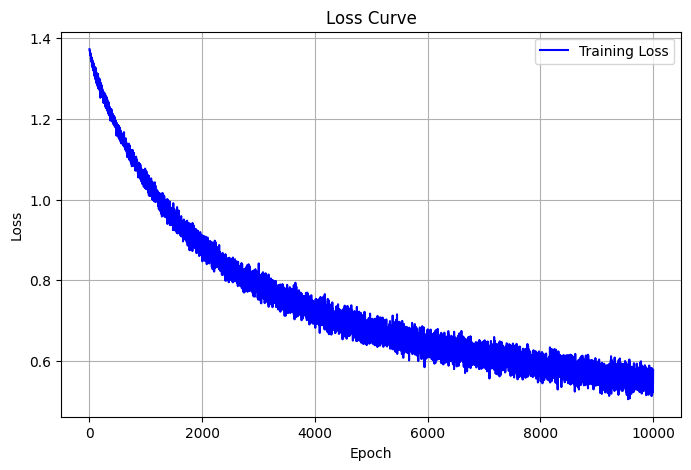

Model parameters saved to All feature model.json
Model parameters loaded from All feature model.json
All Features Accuracy: 0.8667


In [69]:


data = load_iris()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)


model_full = LogisticRegression(learning_rate=0.0001, max_epochs=10000, patience=5)
model_full.fit(X_train, y_train)


model_full.save("All feature model.json")


model_loaded = LogisticRegression()
model_loaded.load("All feature model.json")


accuracy = model_loaded.score(X_test, y_test)
print(f"All Features Accuracy: {accuracy:.4f}")


# ***Classification based on petal length/width***

Loss curve saved as 'loss_curve.png'


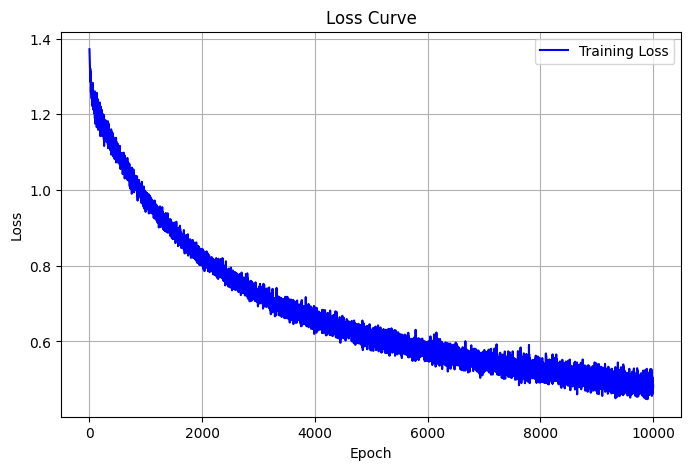

Model parameters saved to model_petal.json
Model parameters loaded from model_petal.json
Petal Accuracy: 0.9333


In [70]:
data = load_iris()
X = data.data
y = data.target
X_petal = X[:, 2:4]
X_train_petal, X_test_petal, y_train_petal, y_test_petal = train_test_split(X_petal, y, test_size=0.1, stratify=y)

model_petal = LogisticRegression(learning_rate=0.001, max_epochs=10000, patience=3)
model_petal.fit(X_train_petal, y_train_petal)


model_petal.save("model_petal.json")


model_petal_loaded = LogisticRegression()
model_petal_loaded.load("model_petal.json")

accuracy = model_petal_loaded.score(X_test_petal, y_test_petal)
print(f"Petal Accuracy: {accuracy:.4f}")





Decision boundary saved as 'Classification based on petal features.png'.


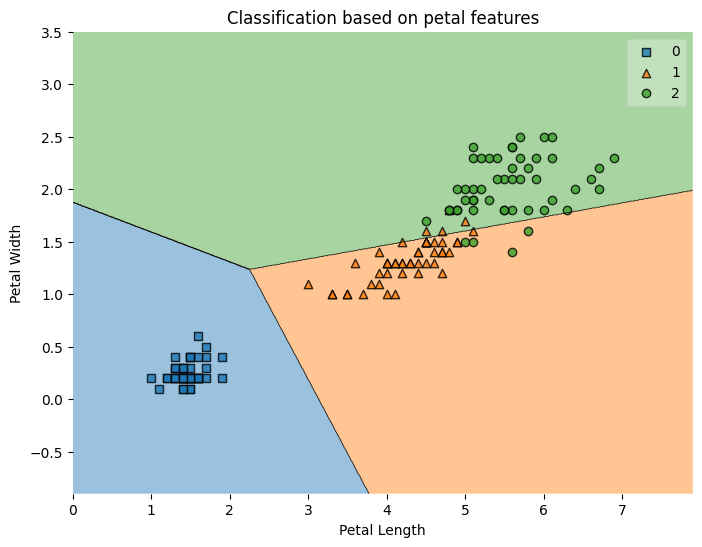

In [71]:
plot_petal = Plot_Decision_Regions(model_petal, selected_features=[0, 1])
plot_petal.plot(X_petal, y, "Classification based on petal features", "Petal Length", "Petal Width", "Classification based on petal features.png")

# ***Classification based on sepal length/width***

Loss curve saved as 'loss_curve.png'


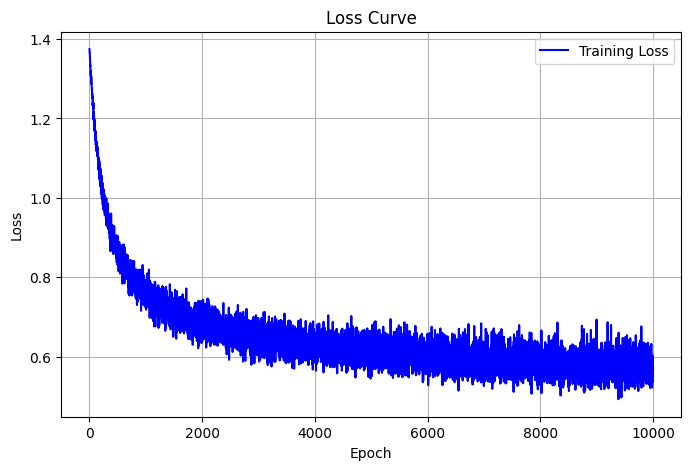

Model parameters saved to model_sepal.json
Model parameters loaded from model_sepal.json
Sepal Accuracy: 0.8667


In [72]:
data = load_iris()
X = data.data
y = data.target
X_sepal = X[:, 0:2]
X_train_sepal, X_test_sepal, y_train_sepal, y_test_sepal = train_test_split(X_sepal, y, test_size=0.1, stratify=y)

model_sepal = LogisticRegression(learning_rate=0.005, max_epochs=10000, patience=3)
model_sepal.fit(X_train_sepal, y_train_sepal)


model_sepal.save("model_sepal.json")


model_sepal_loaded = LogisticRegression()
model_sepal_loaded.load("model_sepal.json")

accuracy = model_sepal_loaded.score(X_test_sepal, y_test_sepal)
print(f"Sepal Accuracy: {accuracy:.4f}")

Decision boundary saved as 'Classification based on sepal features.png'.


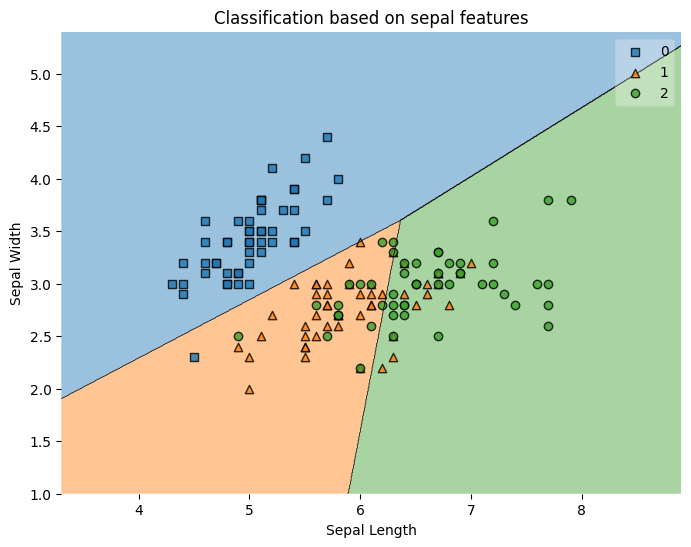

In [73]:
plot_sepal = Plot_Decision_Regions(model_sepal, selected_features=[0, 1])
plot_sepal.plot(X_sepal, y, "Classification based on sepal features", "Sepal Length", "Sepal Width", "Classification based on sepal features.png")